### SGD、MBGD、BGD公式：

![](assets/167.jpg)

### 例子

![](assets/162.jpg)

### 上述例子代码实现

performing BGD......: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Plotting ......


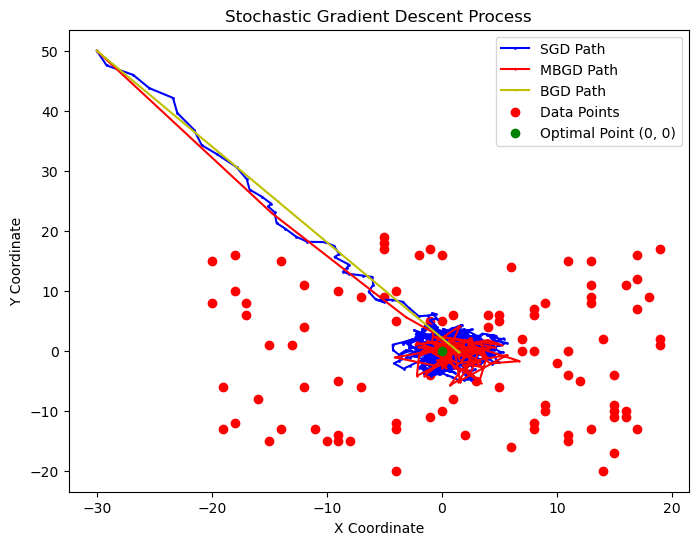

In [1]:
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline


def solver():
    # Parameters
    n_samples = 100      # Number of random points
    lower_bound = -20    # Range for the points
    higher_bound = 20
    alpha = 0.05          # Learning rate (step size)
    w_init = [-30, 50]         # Initial value of w
    n_iters = 1000        # Number of iterations
    mini_batch_size = 10
    total_batch_size = n_samples

    # Generate random data points
    X = [np.random.randint(lower_bound, higher_bound, size=[2,]) for _ in range(n_samples)]
    X = np.array(X)
    w_init = np.array(w_init)

    # List to store the path taken by SGD, MBGD, BGD
    path_sgd = [w_init.copy()]
    path_mbgd = [w_init.copy()]
    path_bgd = [w_init.copy()]

    # Perform SGD
    w = w_init.copy()
    for n_iter in tqdm(list(range(n_iters)), desc='performing SGD......'):
        # Randomly choose a point from X
        x_i = random.choice(X)
        # Update w using the gradient of the squared error
        w = w - alpha * (w - x_i)
        # Store the current w for plotting
        path_sgd.append(w.copy())

    # Perform MBGD
    w = w_init.copy()
    for n_iter in tqdm(list(range(n_iters // mini_batch_size)), desc='performing MBGD......'):
        # Randomly choose mini_batch_size points from X
        x_mini = []
        for _ in range(mini_batch_size):
            x_mini.append(random.choice(X))
        # Update w using the gradient of the squared error, note that the learning rate should expand
        w = w - alpha * mini_batch_size * (w - np.mean(np.array(x_mini), axis=0))
        # Store the current w for plotting
        path_mbgd.append(w.copy())
        
    # Perform BGD
    w = w_init.copy()
    for n_iter in tqdm(list(range(n_iters // total_batch_size)), desc='performing BGD......'):
        # Update w using the gradient of the squared error, note that the learning rate should expand
        w = w - alpha * mini_batch_size* (w - np.mean(X, axis=0))
        # Store the current w for plotting
        path_bgd.append(w.copy())

    # Convert path to numpy array for easier handling
    path_sgd = np.array(path_sgd)
    path_mbgd = np.array(path_mbgd)
    path_bgd = np.array(path_bgd)

    # Create the plot
    print('Plotting ......')
    plt.figure(figsize=(8, 6))
    plt.plot(path_sgd[:, 0], path_sgd[:, 1], marker='o', markersize=1, linestyle='-', color='b', label="SGD Path")
    plt.plot(path_mbgd[:, 0], path_mbgd[:, 1], marker='x', markersize=1, linestyle='-', color='r', label="MBGD Path")
    plt.plot(path_bgd[:, 0], path_bgd[:, 1], marker='*', markersize=1, linestyle='-', color='y', label="BGD Path")
    plt.scatter(X[:, 0], X[:, 1], color='r', label="Data Points")  # Data points

    # Mark the origin (the target point [0, 0])
    plt.scatter(0, 0, color='g', label="Optimal Point (0, 0)", zorder=5)

    # Labels and title
    plt.title("Stochastic Gradient Descent Process")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()

    # Show the plot
    plt.show()


if __name__ == '__main__':
    solver()